In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [2]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()
df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [4]:
df.shape

(891, 12)

In [5]:
df = df.drop_duplicates()
df.shape

(891, 12)

In [6]:
df.isnull().mean() * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [7]:
df.drop(columns = ['Cabin'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Sex"] = le.fit_transform(df["Sex"])
df["Embarked"] = le.fit_transform(df["Embarked"])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2


In [9]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,1.538721
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,0.794231
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,2.000000
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,2.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000


In [10]:
df.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.036847,-0.057527,-0.001652,0.012658,0.013083
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307,-0.163517
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500,0.157112
Sex,0.042939,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333,0.104057
Age,0.036847,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067,-0.025252
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651,0.066654
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225,0.038322
Fare,0.012658,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000,-0.221226
Embarked,0.013083,-0.163517,0.157112,0.104057,-0.025252,0.066654,0.038322,-0.221226,1.000000


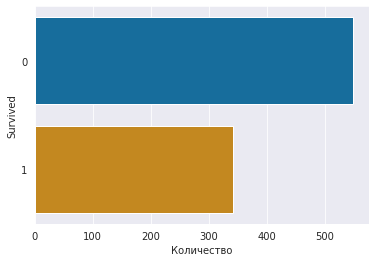

In [11]:
sns.set_style('darkgrid')
sns.countplot(y='Survived',data=df,palette='colorblind')
plt.xlabel('Количество')
plt.show()

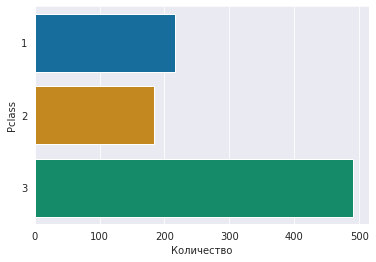

In [12]:
sns.set_style('darkgrid')
sns.countplot(y='Pclass',data=df,palette='colorblind')
plt.xlabel('Количество')
plt.show()

In [13]:
df = df.fillna(df.mean ())

<ipython-input-13-2dc39058e0a7>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.mean ())


In [14]:
y=df['Survived']
# df2 = []
# for i in df:
#   if i != 'Survived':
#     df2.append(i)

# X = df[df2]
df.Fare =round(df.Fare, 6)
X =df[['Pclass', 'Sex', 'Age','SibSp', 'Parch','Embarked']]
X

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,1,22.000000,1,0,2
1,1,0,38.000000,1,0,0
2,3,0,26.000000,0,0,2
3,1,0,35.000000,1,0,2
4,3,1,35.000000,0,0,2
...,...,...,...,...,...,...
886,2,1,27.000000,0,0,2
887,1,0,19.000000,0,0,2
888,3,0,29.699118,1,2,2
889,1,1,26.000000,0,0,0


In [15]:
from sklearn import tree
model=tree.DecisionTreeClassifier(criterion="entropy")
model.fit(X,y)

DecisionTreeClassifier(criterion='entropy')

In [16]:
model.score(X,y)

0.9371492704826038

[Text(0.3748467023982558, 0.9722222222222222, 'X[1] <= 0.5\nentropy = 0.961\nsamples = 891\nvalue = [549, 342]'),
 Text(0.13004178779069767, 0.9166666666666666, 'X[0] <= 2.5\nentropy = 0.824\nsamples = 314\nvalue = [81, 233]'),
 Text(0.03488372093023256, 0.8611111111111112, 'X[2] <= 2.5\nentropy = 0.299\nsamples = 170\nvalue = [9, 161]'),
 Text(0.023255813953488372, 0.8055555555555556, 'X[0] <= 1.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.01744186046511628, 0.75, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.029069767441860465, 0.75, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.046511627906976744, 0.8055555555555556, 'X[2] <= 23.5\nentropy = 0.276\nsamples = 168\nvalue = [8, 160]'),
 Text(0.040697674418604654, 0.75, 'entropy = 0.0\nsamples = 40\nvalue = [0, 40]'),
 Text(0.05232558139534884, 0.75, 'X[2] <= 27.5\nentropy = 0.337\nsamples = 128\nvalue = [8, 120]'),
 Text(0.029069767441860465, 0.6944444444444444, 'X[5] <= 1.0\nentropy = 0.722\nsamples = 20\

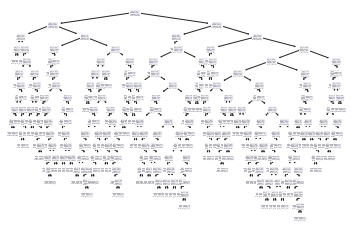

In [17]:
tree.plot_tree(model)

In [18]:
import warnings
warnings.filterwarnings('ignore')

In [19]:
params = {'n_estimators':200,
          'max_depth':12,
          'criterion':'mse',
          'learning_rate':0.03,
          'min_samples_leaf':16,
          'min_samples_split':16
          }

In [20]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(**params)
gbr.fit(X,y)

GradientBoostingRegressor(criterion='mse', learning_rate=0.03, max_depth=12,
                          min_samples_leaf=16, min_samples_split=16,
                          n_estimators=200)

In [21]:
gbr.score(X,y)

0.619478692143306

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import rc, plot
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_curve, classification_report
from sklearn.model_selection import train_test_split

In [23]:
lr = LogisticRegression()
lr.fit(X, y)
lr.score(X,y)

0.8035914702581369

In [24]:
import itertools    
def plot_confusion_matrix(cm, classes,
                              normalize=False,
                              title='Confusion matrix',
                              cmap=plt.cm.Blues):
        import itertools
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)

        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            print("Normalized confusion matrix")
        else:
            print('Confusion matrix, without normalization')

        print(cm)

        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j],
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')

ДЛЯ ЛОГ. РЕГРЕССИИ
Confusion matrix, without normalization
[[473  76]
 [ 99 243]]


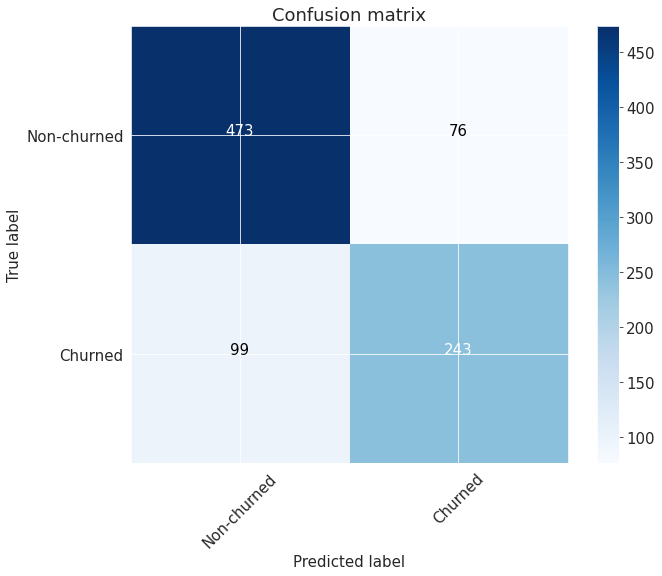

In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

font = {'size' : 15}

plt.rc('font', **font)
print('ДЛЯ ЛОГ. РЕГРЕССИИ')
cnf_matrix = confusion_matrix(y, lr.predict(X))
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Non-churned', 'Churned'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

ДЛЯ РЕШАЮЩЕГО ДЕРЕВА
Confusion matrix, without normalization
[[537  12]
 [ 44 298]]


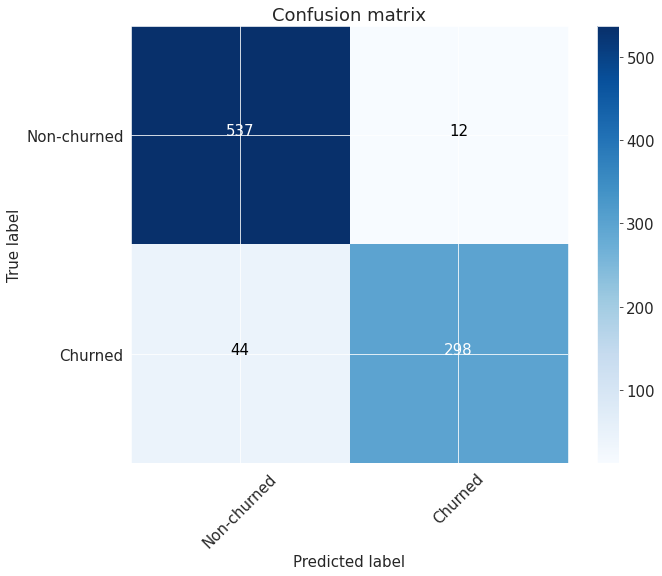

In [26]:
print('ДЛЯ РЕШАЮЩЕГО ДЕРЕВА')
cnf_matrix = confusion_matrix(y, model.predict(X))
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Non-churned', 'Churned'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

In [27]:
from sklearn.metrics import accuracy_score
y_pred = lr.predict(X)
y_true = y
accuracy_score(y_true, y_pred)
accuracy_score(y_true, y_pred, normalize=False)

716

In [28]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X)
y_true = y
accuracy_score(y_true, y_pred)
accuracy_score(y_true, y_pred, normalize=False)

835

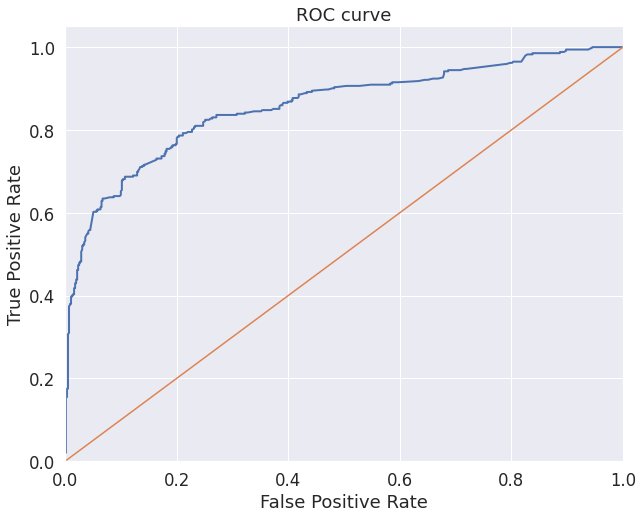

In [29]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = roc_curve(y, lr.predict_proba(X)[:,1], pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()

кол-во k для проверки: 30


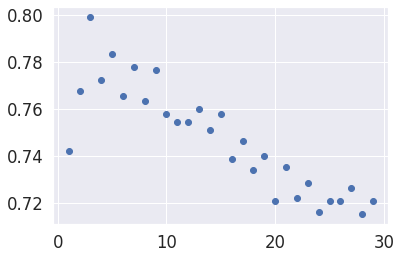

In [30]:

from sklearn.neighbors import KNeighborsClassifier
n =int(input('кол-во k для проверки: '))
k_range = range(1,n)
k_scores = []
for k_number in k_range:
    knn = KNeighborsClassifier(n_neighbors=k_number)
    scores = cross_val_score(knn,X,y,cv=10,scoring='accuracy')
    k_scores.append(scores.mean())

fig, ax = plt.subplots()
ax.scatter(k_range,k_scores)  

In [31]:
for n in k_range:
  knn = KNeighborsClassifier(n_neighbors = n)
  knn.fit(X, y)
  knn.score(X,y)
  print('k:', n,"  Score: ", knn.score(X,y)  )

k: 1   Score:  0.9102132435465768
k: 2   Score:  0.8686868686868687
k: 3   Score:  0.8742985409652076
k: 4   Score:  0.8529741863075196
k: 5   Score:  0.8462401795735129
k: 6   Score:  0.835016835016835
k: 7   Score:  0.8383838383838383
k: 8   Score:  0.8148148148148148
k: 9   Score:  0.8237934904601572
k: 10   Score:  0.813692480359147
k: 11   Score:  0.8215488215488216
k: 12   Score:  0.7991021324354658
k: 13   Score:  0.8080808080808081
k: 14   Score:  0.7845117845117845
k: 15   Score:  0.792368125701459
k: 16   Score:  0.7744107744107744
k: 17   Score:  0.7845117845117845
k: 18   Score:  0.7643097643097643
k: 19   Score:  0.7710437710437711
k: 20   Score:  0.7699214365881033
k: 21   Score:  0.7665544332210998
k: 22   Score:  0.7586980920314254
k: 23   Score:  0.7564534231200898
k: 24   Score:  0.7474747474747475
k: 25   Score:  0.7474747474747475
k: 26   Score:  0.7429854096520763
k: 27   Score:  0.7396184062850729
k: 28   Score:  0.7407407407407407
k: 29   Score:  0.74523007856341

In [32]:
dfdrop = df.drop(['Name', 'Ticket', 'Cabin'], axis=1)
dfdrop

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.000000,1,0,7.2500,2
1,2,1,1,0,38.000000,1,0,71.2833,0
2,3,1,3,0,26.000000,0,0,7.9250,2
3,4,1,1,0,35.000000,1,0,53.1000,2
4,5,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,13.0000,2
887,888,1,1,0,19.000000,0,0,30.0000,2
888,889,0,3,0,29.699118,1,2,23.4500,2
889,890,1,1,1,26.000000,0,0,30.0000,0


In [38]:

from sklearn import preprocessing

names = dfdrop.columns
dfnorm = preprocessing.normalize(dfdrop)
scaled_df = pd.DataFrame(dfnorm, columns=names)
scaled_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.042541,0.000000,0.127623,0.042541,0.935905,0.042541,0.0,0.308423,0.085082
1,0.024746,0.012373,0.012373,0.000000,0.470165,0.012373,0.0,0.881971,0.000000
2,0.108692,0.036231,0.108692,0.000000,0.942001,0.000000,0.0,0.287129,0.072462
3,0.062718,0.015679,0.015679,0.000000,0.548780,0.015679,0.0,0.832578,0.031359
4,0.137164,0.000000,0.082298,0.027433,0.960147,0.000000,0.0,0.220834,0.054866


In [40]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X, y)
knn.score(X,y)

0.8742985409652076